# Importing required Modules and Libraries

# For Regression Analysis

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

# For Classifictaion Analysis

In [123]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

# Importing the Dataset

In [124]:
df=pd.read_csv('Avacado.csv')

checking the first five rows of the dataset

In [125]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


# Understanding the Avocado Dataset

Lets check our data shape:
Dataset has 1517 rows and 14 columns.

In [126]:
df.shape

(1517, 14)

In [127]:

df.columns  # This will print the names of all columns.

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')


The Feature "Unnamed:0" is just a representation of the indexes, so it's useless to keep it,

we'll remove it in pre-processing !

In [128]:

df.tail()  # This will print the last n rows of the Data Frame

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
1512,10,16-10-2016,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016,Charlotte
1513,11,09-10-2016,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016,Charlotte
1514,12,02-10-2016,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016,Charlotte
1515,13,25-09-2016,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016,Charlotte
1516,14,18-09-2016,1.43,182978.30,43116.41,54193.42,16563.91,69104.56,57456.21,11648.35,0.00,conventional,2016,Charlotte


# Checking Missing Values and Datatype  

In [129]:
df.info() # This will give Index, Datatype and Memory information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1517 entries, 0 to 1516
Data columns (total 14 columns):
Unnamed: 0      1517 non-null int64
Date            1517 non-null object
AveragePrice    1517 non-null float64
Total Volume    1517 non-null float64
4046            1517 non-null float64
4225            1517 non-null float64
4770            1517 non-null float64
Total Bags      1517 non-null float64
Small Bags      1517 non-null float64
Large Bags      1517 non-null float64
XLarge Bags     1517 non-null float64
type            1517 non-null object
year            1517 non-null int64
region          1517 non-null object
dtypes: float64(9), int64(2), object(3)
memory usage: 166.0+ KB


Well as a first observation we can see that we are lucky, we dont have any missing values

(1517 complete data) and 14 columns. Now let's do some Feature Engineering on the Date Feature

in pre-processing later so we can be able to use the day and the month columns in building our

machine learning model later. ( I didn't mention the year because its already there in data frame)

# Statistical Summary of Dataset

In [130]:
# Use include='all' option to generate descriptive statistics for all columns
# You can get idea about which column has missing values using this
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,1517.000000,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000
mean,26.995386,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821
std,14.848287,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324
min,0.000000,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000
25%,14.000000,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000
50%,29.000000,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000
75%,39.000000,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000
max,51.000000,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000


In [131]:
df.isnull().sum()  # Will show you null count for each column, but will not count Zeros(0) as null

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

We can see that no missing values exist in dataset, that's great!

# Data Preprocessing

The Feature "Unnamed:0" is just a representation of the indexes, so it's useless to keep it, lets remove it now 

In [132]:
df.drop('Unnamed: 0',axis=1,inplace=True)

Lets check our data head again to make sure that the Feature Unnamed:0 is removed

In [133]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


Earlier in info we have seen that Date is Object type not the date type. We have to change its type

to date type.

In [134]:
df['Date']=pd.to_datetime(df['Date'])
df['Month']=df['Date'].apply(lambda x:x.month)
df['Day']=df['Date'].apply(lambda x:x.day)

Lets check the head to see what we have done:

In [135]:
df.dtypes

Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                     int64
region                  object
Month                    int64
Day                      int64
dtype: object

In [136]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,6,12
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


# Outliers Detection

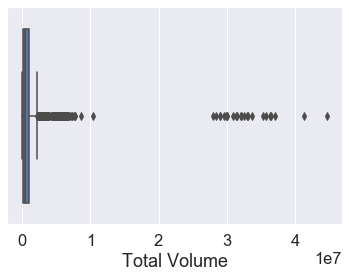

In [137]:
sns.boxplot(df['Total Volume'])

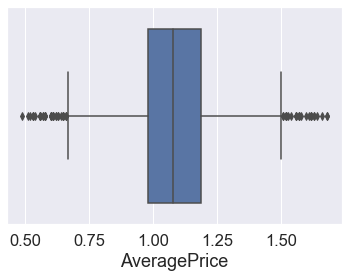

In [138]:
sns.boxplot(df['AveragePrice'])

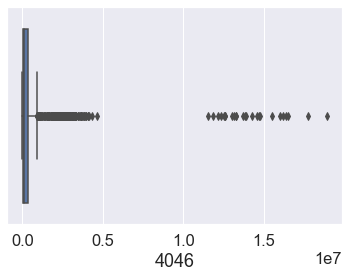

In [139]:
sns.boxplot(df['4046'])

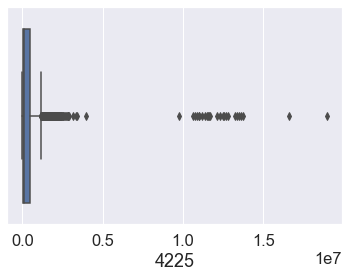

In [140]:
sns.boxplot(df['4225'])

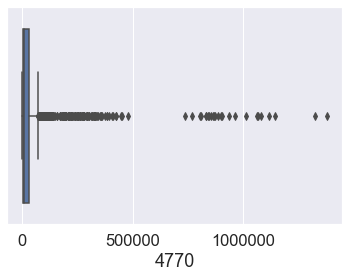

In [141]:
sns.boxplot(df['4770'])

# Removing Outliers

There are so many outliers present in each columns of the Dataset ,so if we start removing each row

with outlier than we would loose so many of rows and as our dataset is having less than 100k rows

so removing so many rows may impact our result.

We will try to resolve this problem later through standardization technique.

# Checking the Skewness of the Data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000220A9561848>,
      dtype=object)

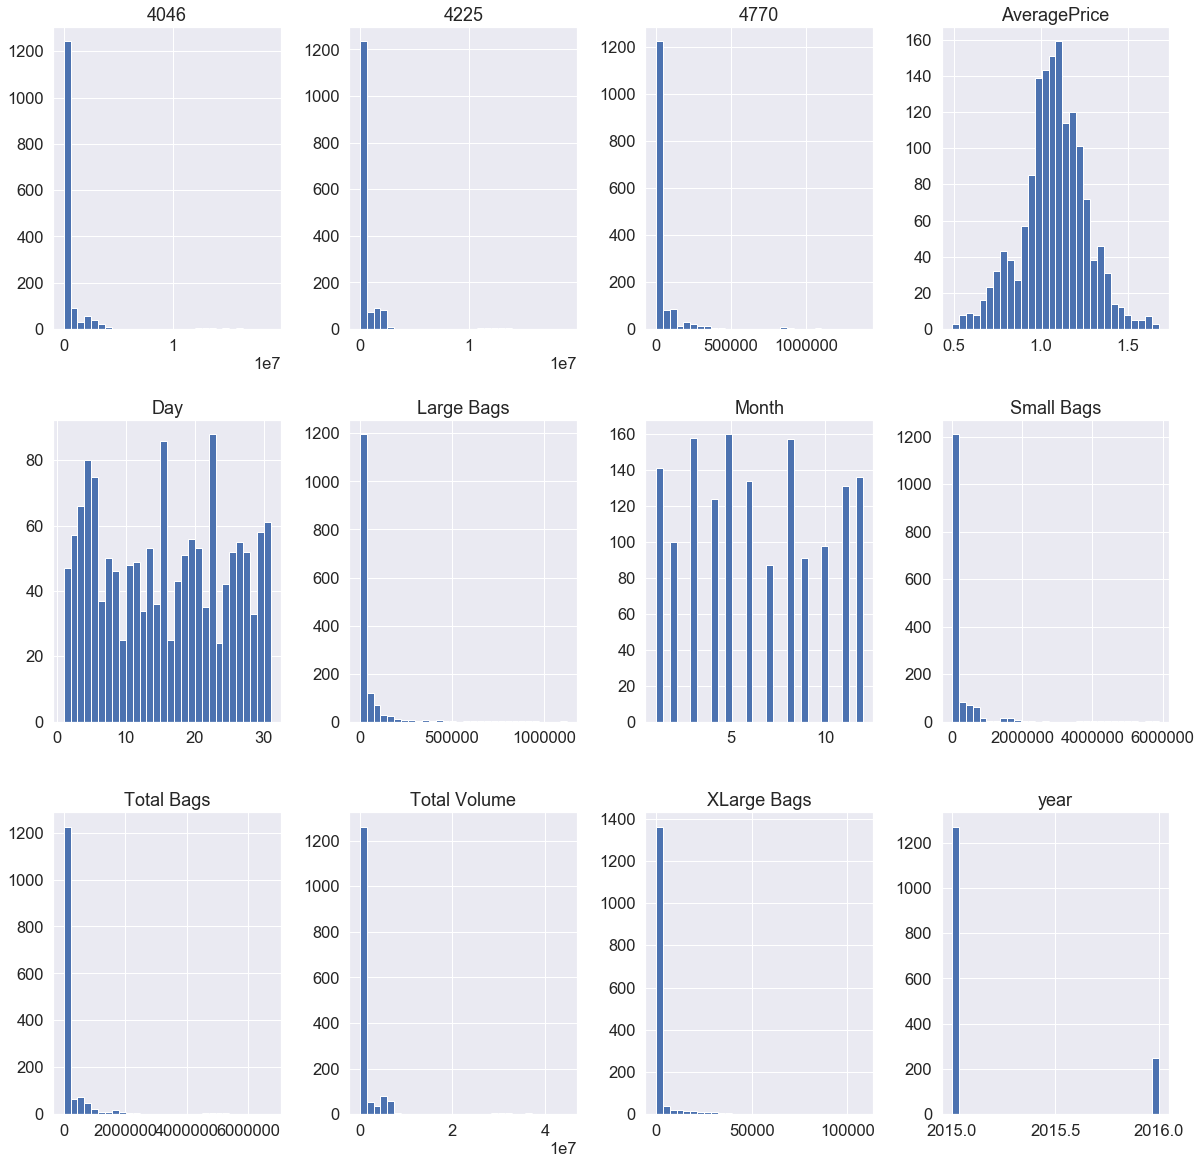

In [142]:
df.hist(figsize=(20,20), grid = True, layout = (3,4), bins = 30)

# Removal Of Skewness

Due to non removal of the outliers the skewness is visible in so many columns.Soo as this is the small

dataset we would try to remove the skewness in later part of the analysis through standardization

technique

# Correlation Analysis

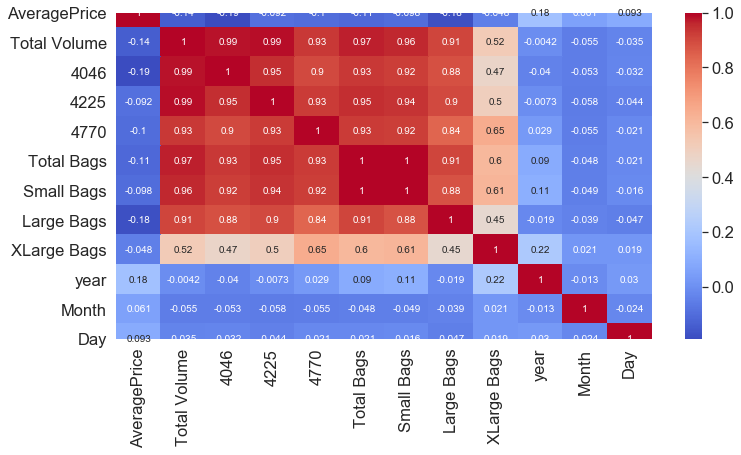

In [143]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

In [144]:
df.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day
AveragePrice,1.000000,-0.140470,-0.190096,-0.092084,-0.100567,-0.111597,-0.097682,-0.177480,-0.048284,0.178683,0.060642,0.092589
Total Volume,-0.140470,1.000000,0.985568,0.987154,0.934347,0.967689,0.960642,0.910226,0.521717,-0.004189,-0.055212,-0.034857
4046,-0.190096,0.985568,1.000000,0.951952,0.898570,0.930395,0.922278,0.884229,0.474063,-0.040439,-0.053007,-0.031806
4225,-0.092084,0.987154,0.951952,1.000000,0.927757,0.951779,0.943988,0.900496,0.504718,-0.007254,-0.058429,-0.044008
4770,-0.100567,0.934347,0.898570,0.927757,1.000000,0.926405,0.923607,0.840523,0.646053,0.029222,-0.055079,-0.021318
Total Bags,-0.111597,0.967689,0.930395,0.951779,0.926405,1.000000,0.997341,0.911336,0.601856,0.090108,-0.047747,-0.021137
Small Bags,-0.097682,0.960642,0.922278,0.943988,0.923607,0.997341,1.000000,0.879131,0.611300,0.106382,-0.048978,-0.016462
Large Bags,-0.177480,0.910226,0.884229,0.900496,0.840523,0.911336,0.879131,1.000000,0.447779,-0.018678,-0.039242,-0.046578
XLarge Bags,-0.048284,0.521717,0.474063,0.504718,0.646053,0.601856,0.611300,0.447779,1.000000,0.218342,0.021452,0.019315
year,0.178683,-0.004189,-0.040439,-0.007254,0.029222,0.090108,0.106382,-0.018678,0.218342,1.000000,-0.013144,0.029744


As we can from the heatmap above, all the Features are not correleted with the Average Price column, 

instead most of them are correlated with each other. So now I am bit worried because that will not 

help us get a good model. Lets try and see.

First we have to do some Feature Engineering on the categorical Features : region and type

# Univariate and Bivariate Analysis

In [145]:
print(df.type.nunique()) #number of different types
print(df.year.nunique()) #number of different year
print(df.region.nunique()) #number of different regions

1
2
51


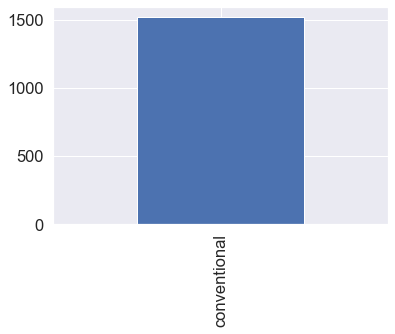

conventional    1517
Name: type, dtype: int64

In [146]:
df.type.value_counts().plot(kind = 'bar')
plt.show()
df.type.value_counts()

In [147]:
df.region.value_counts()

California             76
Albany                 67
Boise                  65
BaltimoreWashington    65
Boston                 62
Atlanta                54
PhoenixTucson          52
BuffaloRochester       51
Spokane                49
Columbus               47
NewYork                44
Jacksonville           41
Detroit                40
SouthCentral           39
SanDiego               38
West                   36
Louisville             34
Tampa                  34
Charlotte              31
Portland               30
Houston                29
NorthernNewEngland     29
WestTexNewMexico       27
Nashville              25
TotalUS                25
Denver                 24
SouthCarolina          24
Chicago                23
GrandRapids            23
Pittsburgh             22
RichmondNorfolk        21
Orlando                21
HarrisburgScranton     19
Syracuse               19
GreatLakes             18
Midsouth               18
MiamiFtLauderdale      17
Roanoke                17
DallasFtWort

In which range Average price lies, what is distribution look like?

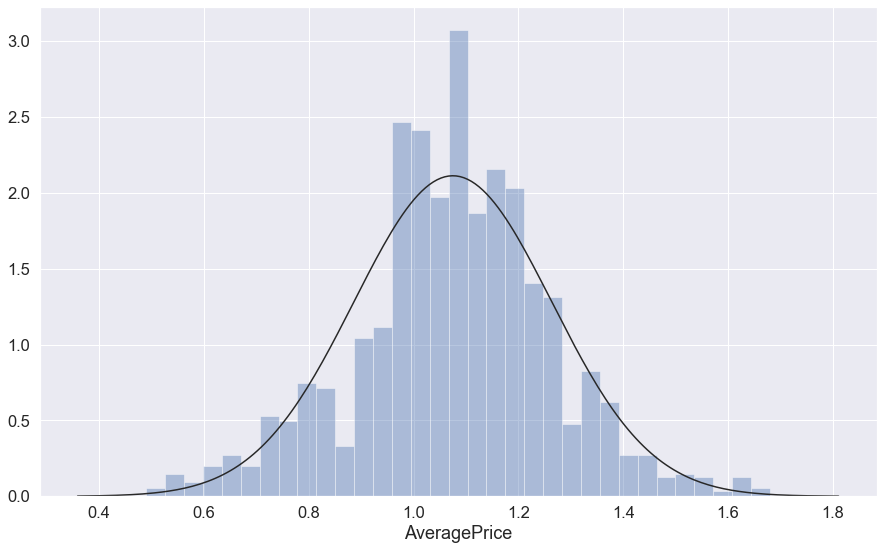

In [148]:
sns.set(font_scale=1.5) 
from scipy.stats import norm
fig, ax = plt.subplots(figsize=(15, 9))
sns.distplot(a=df.AveragePrice, kde=False, fit=norm)

Average Price distribution shows that for most cases price of avocado is between 1 to 1.4.


 How Average price is distributed over the months for Conventional type

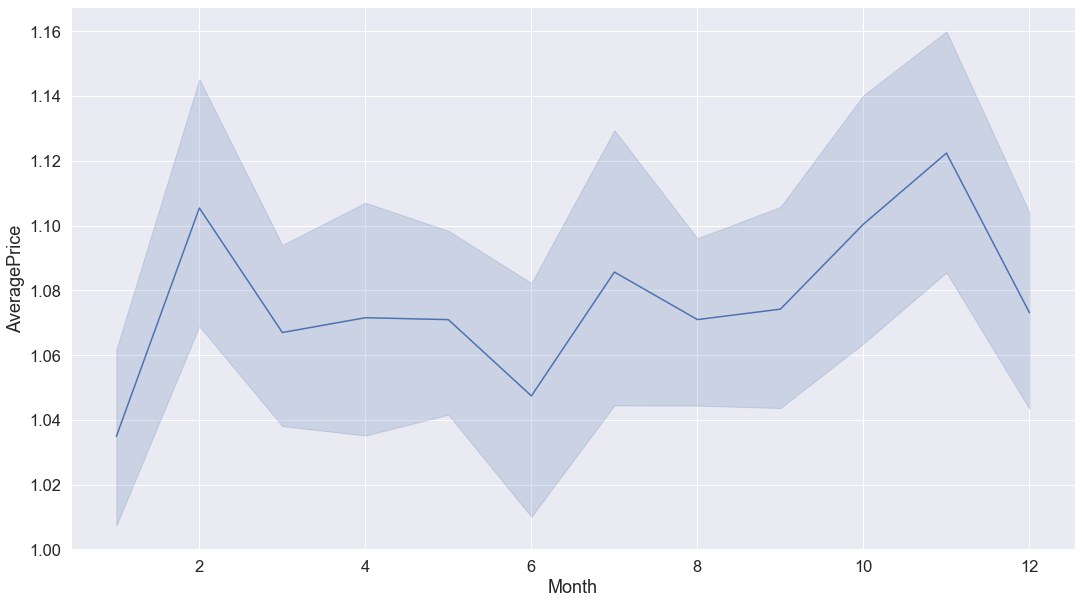

In [149]:
plt.figure(figsize=(18,10))
sns.lineplot(x="Month", y="AveragePrice", data=df)
plt.show()

Looks like there was a hike between months 10-12

 What are TOP 5 regions where Average price are very high?

Text(0.5, 1.0, 'Average Price of Avocado According to Region')

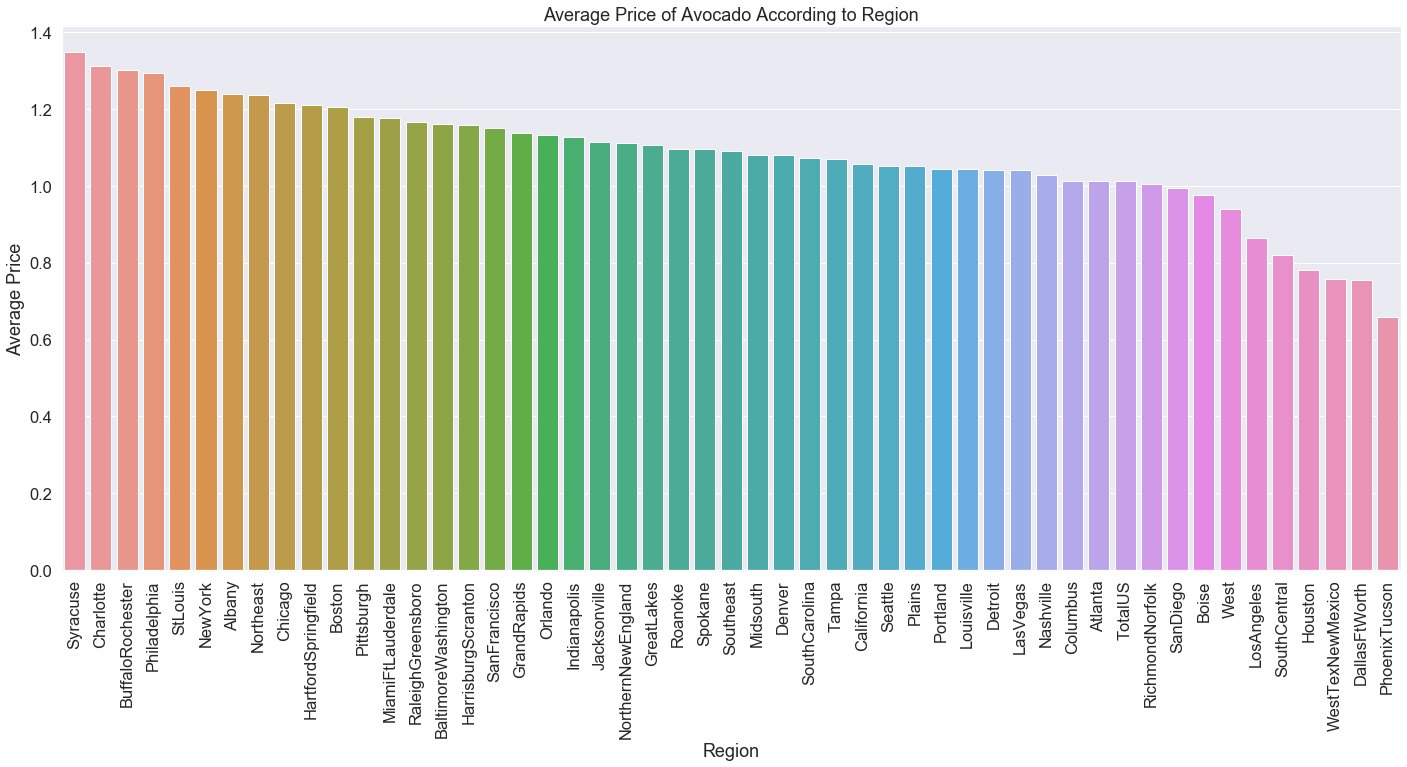

In [150]:
region_list=list(df.region.unique())
average_price=[]

for i in region_list:
    x=df[df.region==i]
    region_average=sum(x.AveragePrice)/len(x)
    average_price.append(region_average)

df1=pd.DataFrame({'region_list':region_list,'average_price':average_price})
new_index=df1.average_price.sort_values(ascending=False).index.values
sorted_data=df1.reindex(new_index)

plt.figure(figsize=(24,10))
ax=sns.barplot(x=sorted_data.region_list,y=sorted_data.average_price)

plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Average Price of Avocado According to Region')


Looks like these region are where price is very high

Syracuse

Charlotte

BuffaloRochester

Philadelphia

Slouis

What are TOP 5 regions where Average consumption is very high

Text(0.5, 1.0, 'Average of Total Volume According to Region')

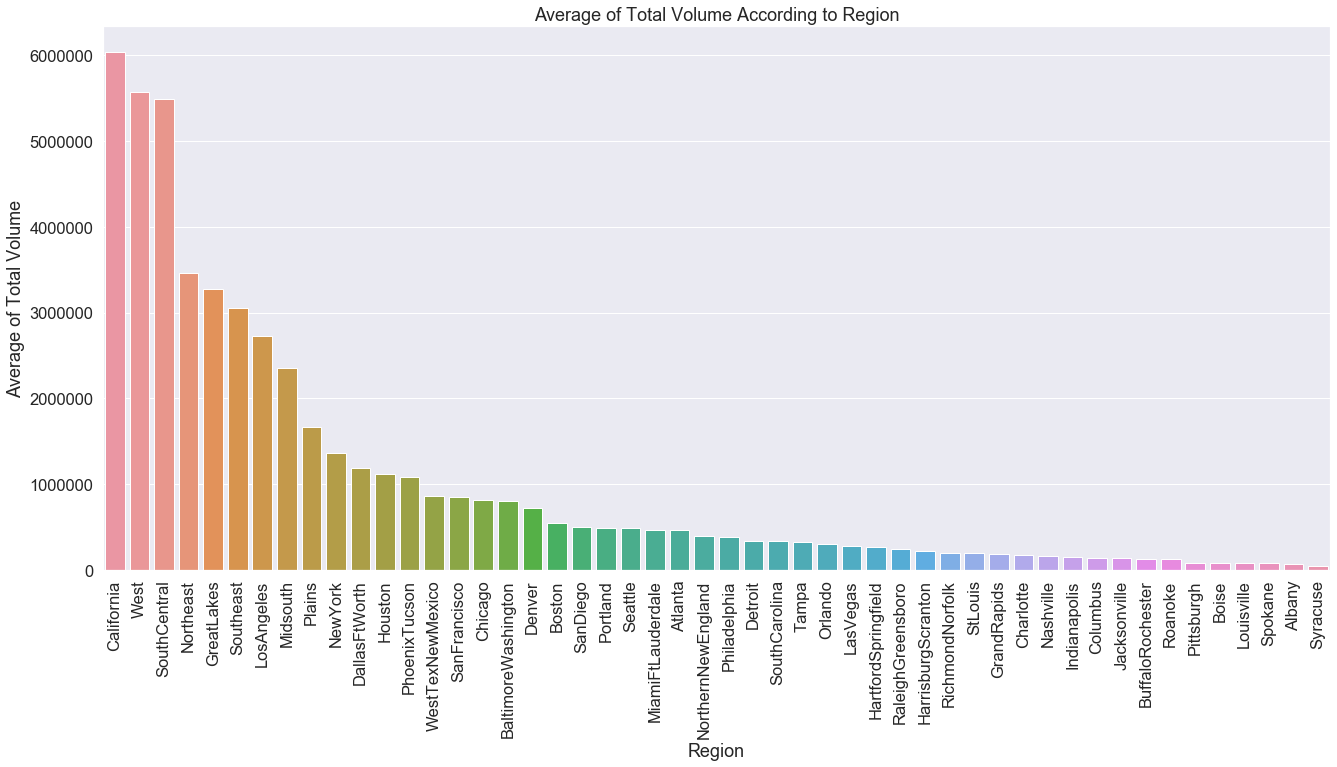

In [151]:
filter1=df.region!='TotalUS'
df1=df[filter1]

region_list=list(df1.region.unique())
average_total_volume=[]

for i in region_list:
    x=df1[df1.region==i]
    average_total_volume.append(sum(x['Total Volume'])/len(x))
df3=pd.DataFrame({'region_list':region_list,'average_total_volume':average_total_volume})

new_index=df3.average_total_volume.sort_values(ascending=False).index.values
sorted_data1=df3.reindex(new_index)

plt.figure(figsize=(22,10))
ax=sns.barplot(x=sorted_data1.region_list,y=sorted_data1.average_total_volume)

plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average of Total Volume')
plt.title('Average of Total Volume According to Region')

Looks like these region are where Consumption is very high

West

California

SouthCentral

Northeast

GreatLakes

 In which year and for which region was the Average price the highest?

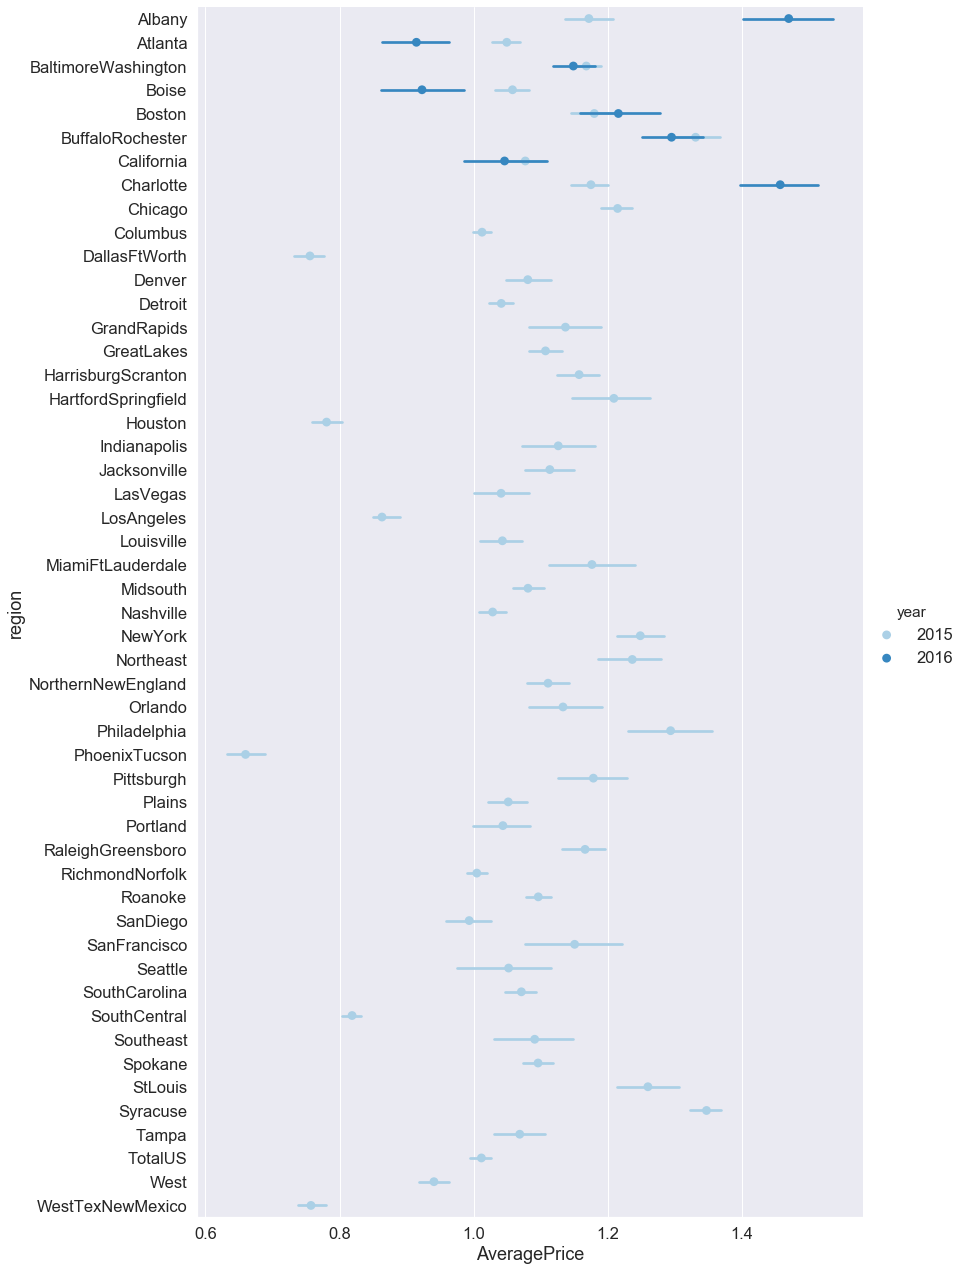

In [152]:
g = sns.factorplot('AveragePrice','region',data=df,
                   hue='year',
                   size=18,
                   aspect=0.7,
                   palette='Blues',
                   join=False,
                  )
              

Looks like there was a huge increase in Avocado prices as the demand was little high in Year 2017 

in SanFranciso region. If you'll search it on google, you'll find the same.

How price is distributed over the date column?

Now lets do some plots!! I'll start by plotting the Avocado's Average Price through the Date column

Text(0.5, 1.0, 'Average Price')

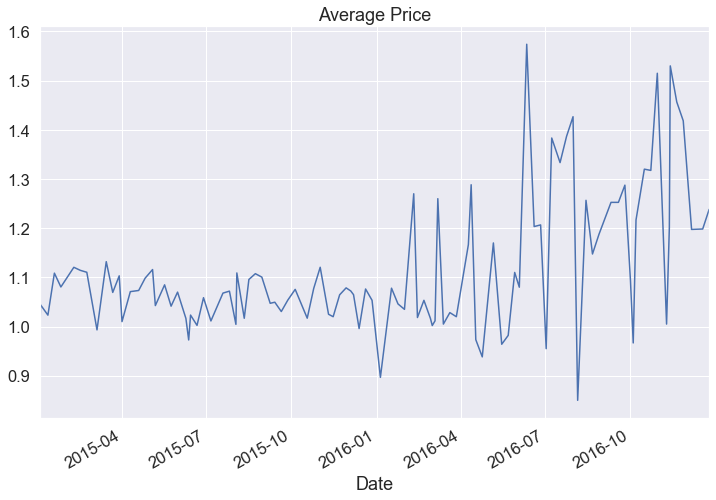

In [153]:

byDate=df.groupby('Date').mean()
plt.figure(figsize=(12,8))
byDate['AveragePrice'].plot()
plt.title('Average Price')


This also shows there was a huge hike in prices after July 2017 and before Jan 2018. 

This was also confirmed in earlier graph too.


# Feature Engineering -->> Label Encoding

In [154]:
df['region']=LabelEncoder().fit_transform(df['region'])

In [155]:
df.dtypes

Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                     int64
region                   int32
Month                    int64
Day                      int64
dtype: object

Data Preprocessing

In [156]:
#removing date and type columns
df=pd.get_dummies(df.drop(['type','Date'],axis=1),drop_first=True)

In [157]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,0,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,0,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,0,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,0,6,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,0,11,29


In [158]:
df.tail()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,Month,Day
1512,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,2016,7,10,16
1513,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,2016,7,9,10
1514,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,2016,7,2,10
1515,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,2016,7,9,25
1516,1.43,182978.30,43116.41,54193.42,16563.91,69104.56,57456.21,11648.35,0.00,2016,7,9,18


# 1. Regression Analysis (Target Variable=AveragePrice)

# Divide the dataset into training and testing sets

In [291]:
x=df.iloc[:,1:14]
y=df['AveragePrice']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [292]:
x_train.shape

(1213, 12)

In [293]:
x_test.shape

(304, 12)

In [294]:
y_train.shape

(1213,)

In [295]:
y_test.shape

(304,)

# Using Standard Scaling for making Data Standardized

In [296]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

# * Model selection/predictions

Now our data are ready! lets apply our model which is going to be the Regression because our 

Target variable 'AveragePrice' is continuous.

Let's now begin to train out regression model! We will need to first split up our data 

into an X array that contains the features to train on, and a y array with the target variable

The characteristics of the given problem are:

Regression: The target variable is a quantity.

Small dataset: Less than 100K samples.

Few features should be important: The correlation matrix indicates that a few features contain the information to predict the target variable.

This characteristic makes the following methods most promising: Ridge Regression, Support Vector Regression, Ensemble Regressor, Random Forest Regressor.

Overview Metrics Mean Squared Error (MSE)

Root Mean Squared Logarithmic Error (RMSLE) RMSLE

R2 Score

We will evaluate the performance of these models in the following:

Are we good with Linear Regression? Lets find out.

In [297]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)

In [298]:
from sklearn import metrics
print('MAE:', mean_absolute_error(y_test, pred))
print('MSE:', mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, pred)))

MAE: 0.1303310890143929
MSE: 0.028445272208604003
RMSE: 0.16865726254331298


The RMSE is low so we can say that we do have a good model, but lets check to be more sure.


Lets plot the y_test vs the predictions

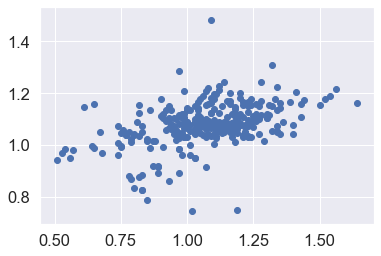

In [300]:
plt.scatter(x=y_test,y=pred)

As we can see that we don't have a straight line so I am not sure that this is the best model 

we can apply on our data


Lets try working with the Decision Tree Regression mode

P.2 Are we good with Decision Tree Regression? Lets find out..

In [301]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred=dtr.predict(x_test)

Text(0, 0.5, 'Predicted Y')

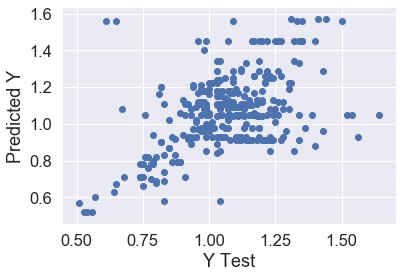

In [302]:

plt.scatter(x=y_test,y=pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [303]:

print('MAE:', mean_absolute_error(y_test, pred))
print('MSE:', mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, pred)))

MAE: 0.1444078947368421
MSE: 0.03967828947368421
RMSE: 0.19919409999717413


Are we good with Random Forest Regressor? Lets find out.

In [304]:
from sklearn.ensemble import RandomForestRegressor
rdr = RandomForestRegressor()
rdr.fit(x_train,y_train)
pred=rdr.predict(x_test)

In [305]:
print('MAE:', mean_absolute_error(y_test, pred))
print('MSE:', mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, pred)))

MAE: 0.09973355263157893
MSE: 0.020958700657894732
RMSE: 0.144771201065318


Well as we can see the RMSE is lower than the two previous models, so the RandomForest

Regressor is the best model in this case.

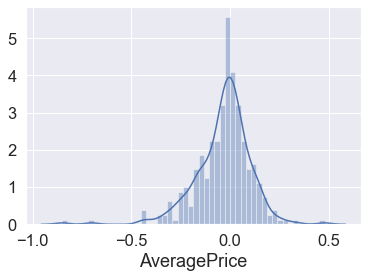

In [306]:
sns.distplot((y_test-pred),bins=50)

,Y Test,Pred
724,1.18,1.199
812,1.25,1.204
1466,1.08,1.133
1469,1.07,1.043
51,1.22,1.277


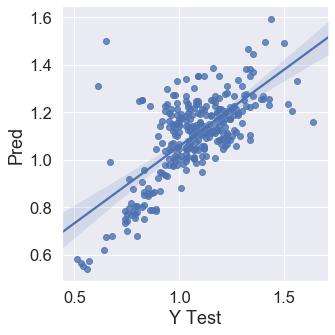

In [307]:

data = pd.DataFrame({'Y Test':y_test , 'Pred':pred},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred',data=data,palette='rainbow')
data.head()

In [308]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

0.4027624236991033


# Cross Validation on Random Forest Regressor


In [310]:
#Now lets try to do some evaluation for random forest model using cross validation.
rfc_eval = cross_val_score(estimator = rdr, X = x_train, y = y_train, cv = 4)
rfc_eval.mean()

0.7606528087849714

# Storing the predicted results in csv file

In [316]:
rfpred=pd.DataFrame(pred,columns=['rfpred']).to_csv('Avacado-Regressor')

# 2. Classification Analysis (Target Variable='Region')

In [319]:
X=df.drop('region',axis=True)

In [320]:
Y=df['region']

In [321]:
X.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,6,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,11,29


In [323]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: region, dtype: int32

In [325]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [326]:
X_train.shape

(1213, 12)

In [327]:
X_test.shape

(304, 12)

In [328]:
Y_train.shape

(1213,)

In [329]:
Y_test.shape

(304,)

# Model Selection

The target variable in the given dataset is being converted into classifications hence the problem

becomes classification problem.

Therefore the machine learning algorithms of classification can be applied here in for training and

testing of data.

We will check for the best model one by one

# Applying various Machine Learning Models to Train and test the Dataset

In [330]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [331]:
model=[LogisticRegression(),GaussianNB(),SVC(),DecisionTreeClassifier(),RandomForestClassifier()]

In [332]:
for m in model:
    m.fit(X_train,Y_train)
    m.score(X_train,Y_train)
    predm=m.predict(X_test)
    print(accuracy_score(Y_test,predm))
    print(confusion_matrix(Y_test,predm))
    print(classification_report(Y_test,predm))
    print('\n ')

0.8421052631578947
[[ 9  0  0 ...  0  0  0]
 [ 0 15  0 ...  0  0  0]
 [ 0  0 12 ...  0  0  0]
 ...
 [ 0  0  0 ...  4  0  0]
 [ 0  0  0 ...  0  5  0]
 [ 0  0  0 ...  0  0  6]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       0.79      1.00      0.88        15
           2       0.92      1.00      0.96        12
           3       1.00      0.83      0.91        12
           4       0.67      1.00      0.80         6
           5       1.00      0.88      0.93         8
           6       0.93      0.82      0.87        17
           7       0.78      0.78      0.78         9
           8       1.00      1.00      1.00         7
           9       0.82      1.00      0.90         9
          10       0.00      0.00      0.00         5
          11       1.00      1.00      1.00         3
          12       1.00      1.00      1.00        10
          13       1.00      1.00      1.00         4
          14  

Random Forest Classifier  Model is giving best accuracy score which is 94%.

In [340]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, Y_train)
pred_rfc = rfc.predict(X_test)

In [342]:
print(classification_report(Y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       1.00      0.93      0.97        15
           2       1.00      1.00      1.00        12
           3       1.00      1.00      1.00        12
           4       0.75      1.00      0.86         6
           5       1.00      1.00      1.00         8
           6       1.00      1.00      1.00        17
           7       0.90      1.00      0.95         9
           8       1.00      1.00      1.00         7
           9       0.90      1.00      0.95         9
          10       1.00      0.80      0.89         5
          11       1.00      1.00      1.00         3
          12       1.00      1.00      1.00        10
          13       1.00      1.00      1.00         4
          14       1.00      1.00      1.00         4
          15       1.00      1.00      1.00         7
          16       1.00      1.00      1.00         2
          17       0.75    

# Cross Validation  on RFC

In [343]:
#Now lets try to do some evaluation for random forest model using cross validation.
rfc_eval = cross_val_score(estimator = rfc, X = X_train, y = Y_train, cv = 10)
rfc_eval.mean()

0.970029603207006

Random forest accuracy increases from 96% to approx 97% using cross validation score

# Storing the predicted results in csv file

I have selected RFC Model as best model as it is giving me best accuracy score after performing

overfitting and underfitting through Cross Validation Technique 

In [344]:
pred_rfc = pd.DataFrame(pred_rfc, columns=['pred_rfc']).to_csv('Avacado-Classifier.csv')

# Saving the best Model as a pickle in a file.

In [345]:
from sklearn.externals import joblib

In [346]:
joblib.dump(rfc,'Avacado-Classifier.pkl')

['Avacado-Classifier.pkl']

In [347]:
joblib.dump(rdr,'Avacado-Regressor.pkl')

['Avacado-Regressor.pkl']